In [26]:
import pandas as pd
import mysql.connector
from pathlib import Path

# ------------------------------
folder_path = Path(r"C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset")
# ------------------------------

# Connect to MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='SHIva@123',
    database='ecommerce'
)
cursor = conn.cursor()

# Function to map pandas dtypes to MySQL types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Automatically detect all CSV files in the folder
csv_files = list(folder_path.glob("*.csv"))  # returns list of Path objects

if not csv_files:
    print(f"No CSV files found in {folder_path}")
else:
    print(f"Found {len(csv_files)} CSV files in folder.")

# Process each CSV file
for file_path in csv_files:
    table_name = file_path.stem.lower()  # use filename (without extension) as table name
    print(f"\nProcessing file: {file_path} -> Table: {table_name}")
    
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        continue
    
    if df.empty:
        print(f"Skipping empty file: {file_path}")
        continue
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]
    
    # Generate CREATE TABLE statement
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)
    
    # Insert data
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)
    
    conn.commit()
    print(f"Data inserted into table: {table_name}")

# Close database connection
conn.close()
print("\nAll done!")


Found 7 CSV files in folder.

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\customers.csv -> Table: customers
Data inserted into table: customers

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\geolocation.csv -> Table: geolocation
Data inserted into table: geolocation

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\orders.csv -> Table: orders
Data inserted into table: orders

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\order_items.csv -> Table: order_items
Data inserted into table: order_items

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\payments.csv -> Table: payments
Data inserted into table: payments

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target Sales Dataset\products.csv -> Table: products
Data inserted into table: products

Processing file: C:\Users\DELL\OneDrive\Desktop\e-commerce\Target S

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "SHIva@123",
                            database = "ecommerce")
cur = db.cursor() # for activating cursor

# List all unique cities where customers are located.

In [75]:
query = """ select distinct(customer_city) from customers"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["distinct_columns"])
df.head()

,distinct_columns
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [5]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall ()
"count of order in year 2017 is", data [0][0]

('count of order in year 2017 is', 45101)

# Find the total sales per category.

In [13]:
query = """select upper(products.product_category) category,round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on  payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall ()
data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

# Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data = cur.fetchall ()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 

Text(0.5, 1.0, 'count of number of customers in each state')

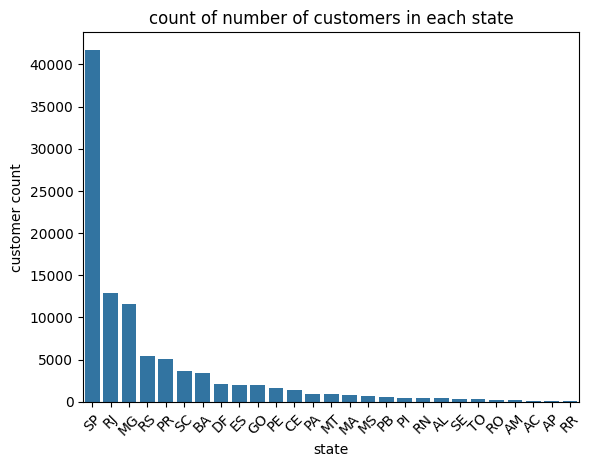

In [53]:
query = """ select count(customer_id),customer_state
            from customers group by customer_state """
cur.execute(query)
data = cur.fetchall ()
df =pd.DataFrame(data,columns=["customer count","state"])
df = df.sort_values(by = "customer count",ascending = False)
sns.barplot(data=df,x="state",y="customer count")
plt.xticks(rotation = 45)
plt.title("count of number of customers in each state")

# Intermediate Queries

# Calculate the number of orders per month in 2018.


      months  total_order
0       July         6292
1     August         6512
2   February         6728
3       June         6167
4      March         7211
5    January         7269
6        May         6873
7      April         6939
8  September           16
9    October            4


Text(0.5, 1.0, 'count of order by months')

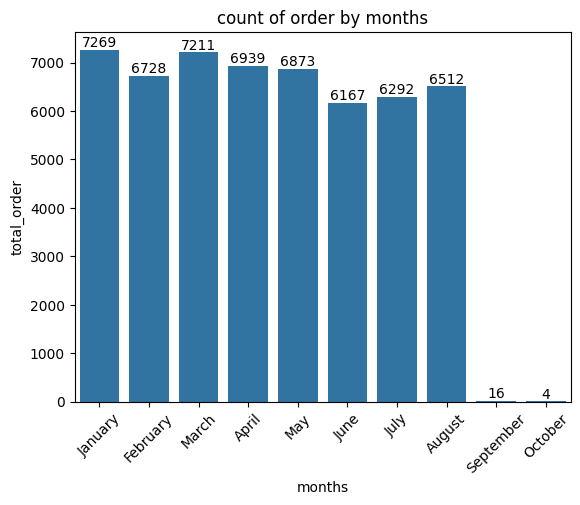

In [50]:
query = """ select monthname(order_purchase_timestamp) months,count(order_id) total_order 
             from orders where year(order_purchase_timestamp) = 2018
             group by monthname(order_purchase_timestamp)"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["months","total_order"])
print(df)
o=["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(data=df,x=df["months"],y=df["total_order"],order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("count of order by months")

# Find the average number of products per order, grouped by customer city.


[Text(0, 0, '1.16'),
 Text(0, 0, '1.14'),
 Text(0, 0, '1.17'),
 Text(0, 0, '1.12'),
 Text(0, 0, '1.27'),
 Text(0, 0, '1.15'),
 Text(0, 0, '1.33'),
 Text(0, 0, '1'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.25')]

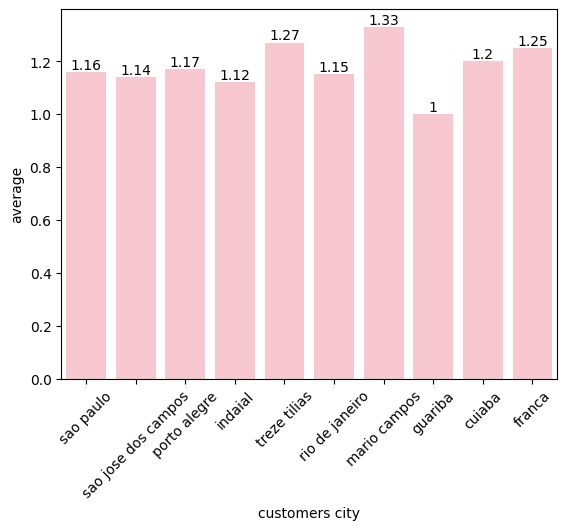

In [40]:
query = """with count_per_order as 
(select orders.order_id,orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2)
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["customers city","average"])
a=df.head(10)
plt.xticks(rotation=45)
ax=sns.barplot(data=a,x="customers city",y="average",color="pink")
ax.bar_label(ax.containers[0])

# Calculate the percentage of total revenue contributed by each product category.

[Text(0, 0, '10.7'),
 Text(0, 0, '10.35'),
 Text(0, 0, '9.9'),
 Text(0, 0, '8.93'),
 Text(0, 0, '8.93')]

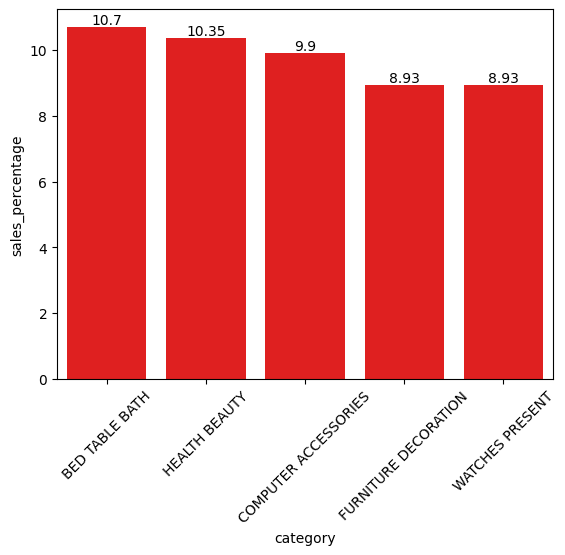

In [46]:
query = """select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on  payments.order_id = order_items.order_id
group by category 
order by sales_percentage Desc"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["category","sales_percentage"])
a=df.head()
plt.xticks(rotation=45)
ax=sns.barplot(data=a,x="category",y="sales_percentage",color="red")
ax.bar_label(ax.containers[0])


# Identify the correlation between product price and the number of times a product has been purchased.

In [6]:
import numpy as np
query = """select products.product_category,count(order_items.order_id),round(avg(order_items.price),2) average_price_per_category
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["category","order count","Price"])
arr1=df["order count"]
arr2=df["Price"]
a= np.corrcoef([arr1,arr2])
print("The corelation between price and number of time of product has been purchased is",a[0][1])

The corelation between price and number of time of product has been purchased is -0.10631514167157557


# Calculate the total revenue generated by each seller, and rank them by revenue.

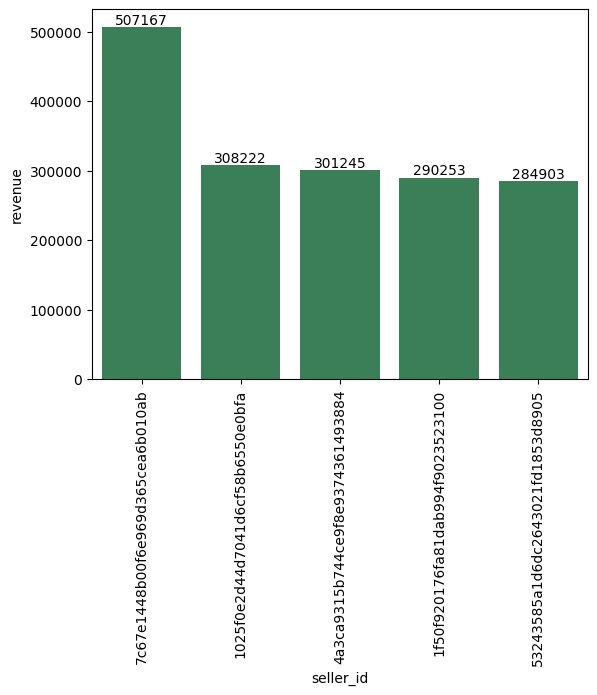

In [51]:
query = """select *, dense_rank() over (order by revenue desc) as rn from 
(select order_items.seller_id,sum(payments.payment_value) as revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head()
ax=sns.barplot(data=df,x="seller_id",y="revenue",color="#2E8B57")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

#  Advanded Queries

# Calculate the moving average of order values for each customer over their order history.

In [58]:
query = """select customer_id,order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_average
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["customer_id","order purchase timestamp","payment","moving average"])
df.head()

,customer_id,order purchase timestamp,payment,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


#  Calculate the cumulative sales per month for each year.

In [65]:
query = """ select years,months,payment,sum(payment)
over (order by years,months) cumulative_sales 
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years,months
order by years,months) as a """
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["years","months","payment","cumulative_sales"])
df

,years,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


#  Calculate the year-over-year growth rate of total sales

In [66]:
query = """ with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years 
order by years)
select years, 
((payment-lag(payment,1) over(order by years))/(lag(payment,1) over(order by years)))*100 from a """
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["years","yoy growth %"])
df

,years,yoy growth %
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


#  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [70]:
query="""with a as (select customers.customer_id,min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id ),
b as (select a.customer_id,count(distinct(orders.order_purchase_timestamp)) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id)
select 100* (count(a.customer_id)) /(count(distinct(b.customer_id)))
from a left join b 
on a.customer_id = b.customer_id"""
cur.execute(query)
data = cur.fetchall ()
df=pd.DataFrame(data,columns=["rate of intentions"])
df

,rate of intentions
0,None


#  Identify the top 3 customers who spent the most money in each year.

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


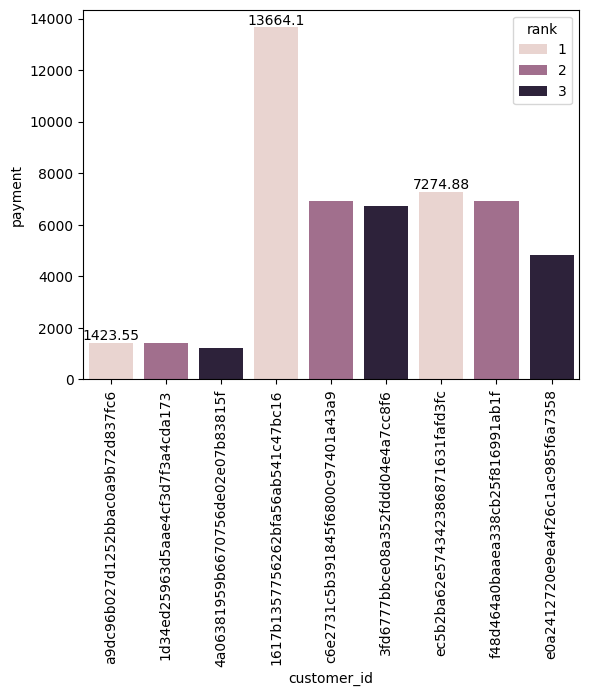

In [84]:
query = """select years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on orders.order_id = payments.order_id
group by orders.order_purchase_timestamp, orders.customer_id) as a
where d_rank <=3"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["year","customer_id","payment","rank"])
ax=sns.barplot(data=df,x="customer_id",y="payment",hue="rank")
plt.xticks(rotation=90)
df